In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [18]:
data = pd.read_csv("GlobalWarming.csv",delimiter=',')

In [19]:
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
Year        308 non-null int64
Month       308 non-null int64
MEI         308 non-null float64
CO2         308 non-null float64
CH4         308 non-null float64
N2O         308 non-null float64
CFC-11      308 non-null float64
CFC-12      308 non-null float64
TSI         308 non-null float64
Aerosols    308 non-null float64
Temp        308 non-null float64
dtypes: float64(9), int64(2)
memory usage: 26.5 KB


In [22]:
X_features = list(data.columns )
X_features.remove( 'Year')
X_features.remove( 'Month' )
X_features

['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols', 'Temp']

In [23]:
data_corr = data[X_features]
data_corr.columns

Index(['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols',
       'Temp'],
      dtype='object')

In [31]:
corr = data_corr.corr()
corr

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
MEI,1.000000,-0.152911,-0.105555,-0.162375,0.088171,-0.039836,-0.076826,0.352351,0.135292
CO2,-0.152911,1.000000,0.872253,0.981135,0.401284,0.823210,0.017867,-0.369265,0.748505
CH4,-0.105555,0.872253,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,0.699697
N2O,-0.162375,0.981135,0.894409,1.000000,0.412155,0.839295,0.039892,-0.353499,0.743242
CFC-11,0.088171,0.401284,0.713504,0.412155,1.000000,0.831381,0.284629,-0.032302,0.380111
CFC-12,-0.039836,0.823210,0.958237,0.839295,0.831381,1.000000,0.189270,-0.243785,0.688944
TSI,-0.076826,0.017867,0.146335,0.039892,0.284629,0.189270,1.000000,0.083238,0.182186
Aerosols,0.352351,-0.369265,-0.290381,-0.353499,-0.032302,-0.243785,0.083238,1.000000,-0.392069
Temp,0.135292,0.748505,0.699697,0.743242,0.380111,0.688944,0.182186,-0.392069,1.000000


<function matplotlib.pyplot.show>

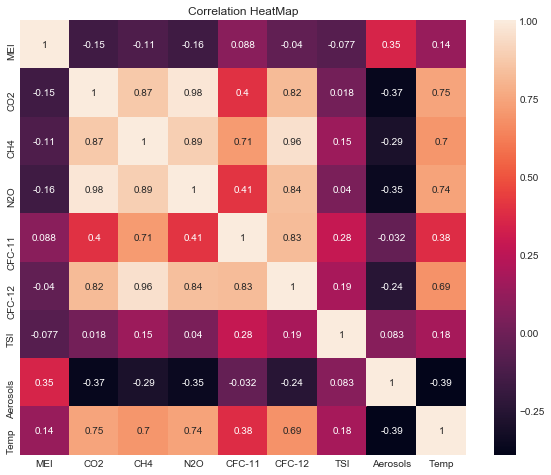

In [47]:
plt.figure(figsize=(10,8)) 
sns.heatmap(corr,annot= True)
plt.title('Correlation HeatMap')
plt.show

##    (CO2-N2O) have high correlation i.e., 0.98 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [61]:
data = pd.read_csv("loans.csv",delimiter=',')

In [62]:
data.head(2)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [63]:
data.info() ## There are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit_policy        9578 non-null int64
purpose              9578 non-null object
int_rate             9578 non-null float64
installment          9578 non-null float64
log_annual_inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days_with_cr_line    9578 non-null float64
revol_bal            9578 non-null int64
revol_util           9578 non-null float64
inq_last_6mths       9578 non-null int64
delinq_2yrs          9578 non-null int64
pub_rec              9578 non-null int64
not_fully_paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [65]:
data.not_fully_paid.value_counts()

0    8045
1    1533
Name: not_fully_paid, dtype: int64

In [66]:
X_features = list(data.columns )
X_features.remove( 'not_fully_paid' )
X_features

['credit_policy',
 'purpose',
 'int_rate',
 'installment',
 'log_annual_inc',
 'dti',
 'fico',
 'days_with_cr_line',
 'revol_bal',
 'revol_util',
 'inq_last_6mths',
 'delinq_2yrs',
 'pub_rec']

In [67]:
data_complete = pd.get_dummies(data[X_features], drop_first = True )

In [68]:
len(data_complete.columns )

18

In [69]:
data_complete.head().T

,0,1,2,3,4
credit_policy,1.000000,1.000000,1.000000,1.000000,1.000000
int_rate,0.118900,0.107100,0.135700,0.100800,0.142600
installment,829.100000,228.220000,366.860000,162.340000,102.920000
log_annual_inc,11.350407,11.082143,10.373491,11.350407,11.299732
dti,19.480000,14.290000,11.630000,8.100000,14.970000
fico,737.000000,707.000000,682.000000,712.000000,667.000000
days_with_cr_line,5639.958333,2760.000000,4710.000000,2699.958333,4066.000000
revol_bal,28854.000000,33623.000000,3511.000000,33667.000000,4740.000000
revol_util,52.100000,76.700000,25.600000,73.200000,39.500000
inq_last_6mths,0.000000,0.000000,1.000000,1.000000,0.000000


In [70]:
data_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 18 columns):
credit_policy                 9578 non-null int64
int_rate                      9578 non-null float64
installment                   9578 non-null float64
log_annual_inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days_with_cr_line             9578 non-null float64
revol_bal                     9578 non-null int64
revol_util                    9578 non-null float64
inq_last_6mths                9578 non-null int64
delinq_2yrs                   9578 non-null int64
pub_rec                       9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9578 non-null uint8
purpose_small_business        9

In [71]:
x = data_complete

In [72]:
y = data.not_fully_paid 

## 1)	Split it into a training and testing set. How should the split be made? Why? Which function will you use to split the data?

In [52]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [73]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3)

In [74]:
y_test[0:10]

8277    1
7400    0
6757    0
3946    0
4142    0
5790    1
6734    0
8060    0
7406    0
1191    0
Name: not_fully_paid, dtype: int64

### We used train_test_split function imported from sklearn.cross_validation package. 
### We opted a 70:30 split , which is regarded as an industry standard .  Because  for the model to be trained , it needs adequate data so as not to underfit / overfit . Later, for the model testing(i.e., checking the model's performance on the data other than the data trained)  also, we need an adequate data . 
### The catchy point is that for the model to be trained , it needs many instances / possibilities (since , being supervised Learning) . So , we give 70% of the data to Train and 30% to the test. 

##         

## 2)	Now, use logistic regression trained on the training set to predict the dependent variable not.fully.paid using all the independent variables.

In [75]:
import statsmodels.api as sm

C:\Users\nagapavan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [76]:
logit = sm.Logit( y_train, sm.add_constant( x_train ) )

In [77]:
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.409338
         Iterations 6


In [78]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         not_fully_paid   No. Observations:                 6704
Model:                          Logit   Df Residuals:                     6685
Method:                           MLE   Df Model:                           18
Date:                Thu, 23 Aug 2018   Pseudo R-squ.:                 0.07282
Time:                        17:15:42   Log-Likelihood:                -2744.2
converged:                       True   LL-Null:                       -2959.7
                                        LLR p-value:                 3.022e-80
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          8.9872      1.537      5.846      0.000       5.974      12.000
credit_policy                 -0.2393      0.102     -2.345      0.019      -0.439      -0.039
int_rate                       0.7685      2.064      0.372      0.710      -3.277       4.814
installment                    0.0014      0.000      6.563      0.000       0.001       0.002
log_annual_inc                -0.4669      0.072     -6.493      0.000      -0.608      -0.326
dti                            0.0010      0.005      0.183      0.855      -0.010       0.012
fico                          -0.0088      0.002     -5.218      0.000      -0.012      -0.006
days_with_cr_line           1.135e-05   1.59e-05      0.713      0.476   -1.99e-05    4.26e-05
revol_bal                   3.725e-06   1.17e-06      3.184      0.001    1.43e-06    6.02e-06
revol_util                     0.0030      0.002      1.961      0.050    1.71e-06       0.006
inq_last_6mths                 0.1066      0.017      6.339      0.000       0.074       0.140
delinq_2yrs                   -0.0380      0.063     -0.604      0.546      -0.162       0.085
pub_rec                        0.3915      0.115      3.399      0.001       0.166       0.617
purpose_credit_card           -0.4927      0.128     -3.847      0.000      -0.744      -0.242
purpose_debt_consolidation    -0.4131      0.093     -4.429      0.000      -0.596      -0.230
purpose_educational            0.0386      0.186      0.208      0.835      -0.325       0.403
purpose_home_improvement       0.1243      0.149      0.836      0.403      -0.167       0.416
purpose_major_purchase        -0.4418      0.197     -2.240      0.025      -0.828      -0.055
purpose_small_business         0.5831      0.138      4.221      0.000       0.312       0.854
==============================================================================================
"""

## 3)	Which independent variables are significant in our model? 

In [79]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [80]:
significant_vars = get_significant_vars( lg )

In [81]:
significant_vars

['const',
 'credit_policy',
 'installment',
 'log_annual_inc',
 'fico',
 'revol_bal',
 'revol_util',
 'inq_last_6mths',
 'pub_rec',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_major_purchase',
 'purpose_small_business']

### The above mentioned variables are the significant independent variables.

## 4)	What is the concept of Dummy variables in Logistic Regression? How would you interpret a Categorical IV in Logistic Regression? What is Logit and Why is it used?

### Dummy variables are mainly used for categorical variables in logistic Regression . For the logistic regression model to consider the categorical variables , it should be converted into single valued nummerical columns , which is achieved by Dummy variables . In case of Logistic Regression , if a categorical variable has 3 classes , 2 dummy variables are created (other dummy is considered into intercept).

### We would interpret a categorical independent variable as dummy variables.

### In case of Logistic Regression, the response variable is categorical (i.e., not continuous as in Linear Regression ). So , it's impossible to get Normal residuals from categorical response variable. This is achieved by Logistic Regression and Logit Function.

### The logit function is the natural log of the odds that Y equals one of the categories.  logit = ln(p/1-p)

### It’s closer to being linear, but it’s still not quite there.  Instead of a linear relationship between X and P, we have a sigmoidal or S-shaped relationship.

### But it turns out that there are a few functions of P that do form reasonably linear relationships with X.  These include:

### Square root of arcsin
### Complimentary log-log
### Probit
### Logit
### Since , Logit is easy to interpret , we use Logit function.

###      





###      

## 5) Predict the probability of the test set loans not being paid back in full. 
## What is the accuracy of the logistic regression model? Input the accuracy as a number between 0 and 1.


In [83]:
from sklearn import metrics

In [84]:
def get_predictions( y_test, model ):
    y_pred_df = pd.DataFrame( { 'actual': y_test,
                               "predicted_prob": model.predict( sm.add_constant( x_test ) ) } )
    return y_pred_df

In [85]:
y_pred_df = get_predictions( y_test, lg )

In [87]:
y_pred_df[0:10]

,actual,predicted_prob
8277,1,0.284308
7400,0,0.110298
6757,0,0.114571
3946,0,0.163972
4142,0,0.125980
5790,1,0.134903
6734,0,0.079679
8060,0,0.374414
7406,0,0.081481
1191,0,0.106686


In [88]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.5 else 0)

In [89]:
y_pred_df[0:10]

,actual,predicted_prob,predicted
8277,1,0.284308,0
7400,0,0.110298,0
6757,0,0.114571,0
3946,0,0.163972,0
4142,0,0.125980,0
5790,1,0.134903,0
6734,0,0.079679,0
8060,0,0.374414,0
7406,0,0.081481,0
1191,0,0.106686,0


In [90]:
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib inline 

In [101]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [102]:
 metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted)

array([[2400,   21],
       [ 440,   13]], dtype=int64)

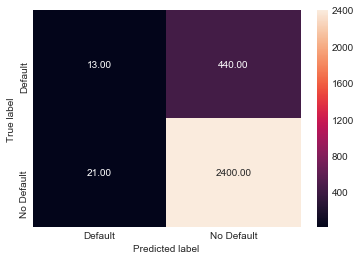

In [103]:
draw_cm( y_pred_df.actual, y_pred_df.predicted )

In [104]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted ), 2 ) )

Total Accuracy :  0.84


## 7) What is the Sensitivity, Specificity and Precision of a classification Model? Which one are used and when?

In [105]:
print( 'Precision : ',np.round( metrics.precision_score( y_test, y_pred_df.predicted ), 2 ) )

Precision :  0.38


In [106]:
print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted ), 2 ) )

Recall :  0.03


In [107]:
cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted, [1,0] )

In [108]:
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])

In [109]:
print('Sensitivity : ', round( sensitivity, 2) )

Sensitivity :  0.03


In [110]:
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])

In [111]:
print('Specificity : ', round( specificity, 2 ) )

Specificity :  0.99


### Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.
### Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative”.
### Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.
### The cheating is resolved by looking at both relevant metrics instead of just one. E.g. the cheating 100% sensitivity that always says “positive” has 0% specificity.

###    



###   

## 8) What is a ROC Curve? Why is it used?

In [112]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob  )
round( float( auc_score ), 2 )

0.67

In [113]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

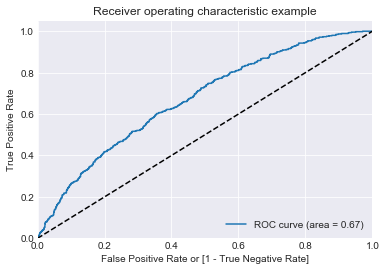

In [114]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob )

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [ ]:
transformer = ReduceVIF()

# Only use 10 columns for speed in this example
X = transformer.fit_transform(X[X.columns[-10:]], y)

X.head()

In [ ]:
## loans ->  log_annual_inc , days_with_cr_line , revol_bal ,revol_util , inq_last_6mths , delinq_2yrs , pub_rec , 

In [138]:
dataset = pd.read_csv("pisa2009train.csv")

In [139]:
dataset.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


In [118]:
dataset.describe()

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
count,3663.000000,3663.000000,3607.000000,3601.000000,3566.000000,3266.000000,3570.000000,3418.000000,3094.000000,3430.000000,...,3592.000000,3598.000000,3629.000000,3477.000000,3414.000000,3520.000000,3663.000000,3663.000000,3501.000000,3663.000000
mean,10.089817,0.511057,0.722761,0.785893,0.879978,0.348132,0.734454,0.859274,0.331933,0.853061,...,0.871659,0.899389,0.289887,266.208225,24.499414,0.967614,0.933934,0.384930,1369.316767,497.911403
std,0.554375,0.499946,0.447697,0.410259,0.325033,0.476451,0.441685,0.347789,0.470983,0.354096,...,0.334515,0.300855,0.453772,148.403525,7.184348,0.177049,0.248431,0.486645,869.983618,95.515153
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000,168.550000
25%,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,225.000000,20.000000,1.000000,1.000000,0.000000,712.000000,431.705000
50%,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,250.000000,25.000000,1.000000,1.000000,0.000000,1212.000000,499.660000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,300.000000,30.000000,1.000000,1.000000,1.000000,1900.000000,566.230000
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2400.000000,75.000000,1.000000,1.000000,1.000000,6694.000000,746.000000


In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 24 columns):
grade                    3663 non-null int64
male                     3663 non-null int64
raceeth                  3628 non-null object
preschool                3607 non-null float64
expectBachelors          3601 non-null float64
motherHS                 3566 non-null float64
motherBachelors          3266 non-null float64
motherWork               3570 non-null float64
fatherHS                 3418 non-null float64
fatherBachelors          3094 non-null float64
fatherWork               3430 non-null float64
selfBornUS               3594 non-null float64
motherBornUS             3592 non-null float64
fatherBornUS             3550 non-null float64
englishAtHome            3592 non-null float64
computerForSchoolwork    3598 non-null float64
read30MinsADay           3629 non-null float64
minutesPerWeekEnglish    3477 non-null float64
studentsInEnglish        3414 non-null float64
schoo

In [140]:
dataset.isnull().values.any() ## there are NULL values

True

In [141]:
dataset.isnull().sum()  ## COLUMN-WISE COUNT OF MISSING VALUES

grade                      0
male                       0
raceeth                   35
preschool                 56
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          569
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish    186
studentsInEnglish        249
schoolHasLibrary         143
publicSchool               0
urban                      0
schoolSize               162
readingScore               0
dtype: int64

## 5. Impute Missing Values
Imputing refers to using a model to replace missing values.

There are many options we could consider when replacing a missing value, for example:

A constant value that has meaning within the domain, such as 0, distinct from all other values.
A value from another randomly selected record.
A mean, median or mode value for the column.
A value estimated by another predictive model.
Any imputing performed on the training dataset will have to be performed on new data in the future when predictions are needed from the finalized model. This needs to be taken into consideration when choosing how to impute the missing values.

For example, if you choose to impute with mean column values, these mean column values will need to be stored to file for later use on new data that has missing values.

Pandas provides the fillna() function for replacing missing values with a specific value.

For example, we can use fillna() to replace missing values with the mean value for each column, as follows:

In [161]:
# fill missing values with mean column values
dataset.schoolSize.fillna(dataset.schoolSize.mean(),inplace=True)
dataset.minutesPerWeekEnglish.fillna(dataset.minutesPerWeekEnglish.mean(),inplace=True)
dataset.studentsInEnglish.fillna(dataset.studentsInEnglish.mean(),inplace=True)

In [164]:
# count the number of NaN values in each column
dataset.isnull().sum()

grade                      0
male                       0
raceeth                   34
preschool                 55
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          569
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish      0
studentsInEnglish          0
schoolHasLibrary         143
publicSchool               0
urban                      0
schoolSize                 0
readingScore               0
dtype: int64

In [174]:
dataset.raceeth.fillna(dataset.raceeth.value_counts().idxmax(),inplace=True)
dataset.preschool.fillna(dataset.preschool.value_counts().idxmax(),inplace=True)
dataset.expectBachelors.fillna(dataset.expectBachelors.value_counts().idxmax(),inplace=True)
dataset.motherHS.fillna(dataset.motherHS.value_counts().idxmax(),inplace=True)
dataset.motherBachelors.fillna(dataset.motherBachelors.value_counts().idxmax(),inplace=True)
dataset.motherWork.fillna(dataset.motherWork.value_counts().idxmax(),inplace=True)
dataset.fatherHS.fillna(dataset.fatherHS.value_counts().idxmax(),inplace=True)
dataset.fatherBachelors.fillna(dataset.fatherBachelors.value_counts().idxmax(),inplace=True)
dataset.fatherWork.fillna(dataset.fatherWork.value_counts().idxmax(),inplace=True)
dataset.selfBornUS.fillna(dataset.selfBornUS.value_counts().idxmax(),inplace=True)
dataset.motherBornUS.fillna(dataset.motherBornUS.value_counts().idxmax(),inplace=True)
dataset.fatherBornUS.fillna(dataset.fatherBornUS.value_counts().idxmax(),inplace=True)
dataset.englishAtHome .fillna(dataset.englishAtHome.value_counts().idxmax(),inplace=True)
dataset.computerForSchoolwork.fillna(dataset.computerForSchoolwork.value_counts().idxmax(),inplace=True)
dataset.read30MinsADay.fillna(dataset.read30MinsADay.value_counts().idxmax(),inplace=True)
dataset.schoolHasLibrary .fillna(dataset.schoolHasLibrary.value_counts().idxmax(),inplace=True)

In [175]:
# count the number of NaN values in each column
dataset.isnull().sum()

grade                    0
male                     0
raceeth                  0
preschool                0
expectBachelors          0
motherHS                 0
motherBachelors          0
motherWork               0
fatherHS                 0
fatherBachelors          0
fatherWork               0
selfBornUS               0
motherBornUS             0
fatherBornUS             0
englishAtHome            0
computerForSchoolwork    0
read30MinsADay           0
minutesPerWeekEnglish    0
studentsInEnglish        0
schoolHasLibrary         0
publicSchool             0
urban                    0
schoolSize               0
readingScore             0
dtype: int64

IN ABOVE CASE , RACEETH IS A CATEGORICAL VARIABLE WITH NA values . For categorical variable , we can't perform mean/median function

In [137]:
dataset.raceeth.mode()

0    White
dtype: object

In [176]:
## for imputing both numerical and categorical data 

In [177]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self,X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self,X, y=None):
        return X.fillna(self.fill)


In [ ]:

data = [
    ['a', 1, 2],
    ['b', 1, 1],
    ['b', 2, 2],
    [np.nan, np.nan, np.nan]
]

X = pd.DataFrame(data)
xt = DataFrameImputer().fit_transform(X)